# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Loading our dataset

In [2]:
df=pd.read_csv('1806346.csv')

In [3]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200353024,DECA,2019-04-01 00:00:00,2019.0,1.928998e+09,2019-03-20,20190320,20190320,20190408.0,USD,RV,1.0,NaN,138.00,20190316.0,NAM4,1.928998e+09,0
1,U001,0200418007,AM,2019-08-02 00:00:00,2019.0,1.929612e+09,2019-07-12,20190712,20190712,20191010.0,USD,RV,1.0,NaN,40.08,20190712.0,NAVR,1.929612e+09,0
2,U001,0200769623,WAL-MAR us,2019-07-23 00:00:00,2019.0,1.929619e+09,2019-07-13,20190713,20190713,20190728.0,USD,RV,1.0,NaN,6532.60,20190713.0,NAH4,1.929619e+09,0
3,U001,0200782001,GORDO,2019-05-23 00:00:00,2019.0,1.929288e+09,2019-05-09,20190509,20190509,20190524.0,USD,RV,1.0,NaN,50813.02,20190509.0,NAA8,1.929288e+09,0
4,U001,0200769623,WAL-MAR associates,2019-01-16 00:00:00,2019.0,1.928576e+09,2019-01-06,20190105,20190106,20190121.0,USD,RV,1.0,NaN,12779.77,20190106.0,NAH4,1.928576e+09,0


In [4]:
df.tail()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
49995,U001,0200337148,COAS us,NaN,2020.0,1.930696e+09,2020-03-25,20200325,20200325,20200409.0,USD,RV,1.0,NaN,60257.96,20200325.0,NAA8,1.930696e+09,1
49996,U001,0200744019,TARG,NaN,2020.0,1.930734e+09,2020-04-03,20200402,20200403,20200418.0,USD,RV,1.0,NaN,611.22,20200403.0,NAA8,1.930734e+09,1
49997,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930648e+09,2020-03-15,20200313,20200315,20200330.0,USD,RV,1.0,NaN,67343.64,20200315.0,NAH4,1.930648e+09,1
49998,U001,0200769623,WAL-MAR associates,NaN,2020.0,1.930741e+09,2020-04-04,20200403,20200404,20200419.0,USD,RV,1.0,NaN,153.21,20200404.0,NAH4,1.930741e+09,1
49999,U001,0200726979,BJ'S foundation,NaN,2020.0,1.930645e+09,2020-03-12,20200312,20200312,20200327.0,USD,RV,1.0,NaN,207.66,20200312.0,NAA8,1.930645e+09,1


# Preprocessing

In [5]:
df.shape

(50000, 19)

### Our dataset contains 50000 rows and 19 cloumns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              46047 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### From info() we see the non null values datatypes which will help us in further preprocessing of our dataset

## Validating the dtype

In [7]:
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

### We need to convert the dtype of all date columns as datetime

In [8]:
df['document_create_date.1'] = df['document_create_date.1'].apply(str)
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'],format='%Y-%m-%d')
df['document_create_date']=df['document_create_date'].apply(str)
df['document_create_date']=pd.to_datetime(df['document_create_date'],format='%Y-%m-%d')
df["buisness_year"] = pd.to_datetime(df["buisness_year"], format='%Y')
df["due_in_date"] =  pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df["baseline_create_date"] =  pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')
df["posting_date"] =  pd.to_datetime(df['posting_date'])
df['clear_date']=pd.to_datetime(df['clear_date'])

In [9]:
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year             datetime64[ns]
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
area_business                    float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

### We have sucessfully converted the dtypes of the date columns to datetime.

In [10]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200353024,DECA,2019-04-01,2019-01-01,1.928998e+09,2019-03-20,2019-03-20,2019-03-20,2019-04-08,USD,RV,1.0,NaN,138.00,2019-03-16,NAM4,1.928998e+09,0
1,U001,0200418007,AM,2019-08-02,2019-01-01,1.929612e+09,2019-07-12,2019-07-12,2019-07-12,2019-10-10,USD,RV,1.0,NaN,40.08,2019-07-12,NAVR,1.929612e+09,0
2,U001,0200769623,WAL-MAR us,2019-07-23,2019-01-01,1.929619e+09,2019-07-13,2019-07-13,2019-07-13,2019-07-28,USD,RV,1.0,NaN,6532.60,2019-07-13,NAH4,1.929619e+09,0
3,U001,0200782001,GORDO,2019-05-23,2019-01-01,1.929288e+09,2019-05-09,2019-05-09,2019-05-09,2019-05-24,USD,RV,1.0,NaN,50813.02,2019-05-09,NAA8,1.929288e+09,0
4,U001,0200769623,WAL-MAR associates,2019-01-16,2019-01-01,1.928576e+09,2019-01-06,2019-01-05,2019-01-06,2019-01-21,USD,RV,1.0,NaN,12779.77,2019-01-06,NAH4,1.928576e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200337148,COAS us,NaT,2020-01-01,1.930696e+09,2020-03-25,2020-03-25,2020-03-25,2020-04-09,USD,RV,1.0,NaN,60257.96,2020-03-25,NAA8,1.930696e+09,1
49996,U001,0200744019,TARG,NaT,2020-01-01,1.930734e+09,2020-04-03,2020-04-02,2020-04-03,2020-04-18,USD,RV,1.0,NaN,611.22,2020-04-03,NAA8,1.930734e+09,1
49997,U001,0200769623,WAL-MAR in,NaT,2020-01-01,1.930648e+09,2020-03-15,2020-03-13,2020-03-15,2020-03-30,USD,RV,1.0,NaN,67343.64,2020-03-15,NAH4,1.930648e+09,1
49998,U001,0200769623,WAL-MAR associates,NaT,2020-01-01,1.930741e+09,2020-04-04,2020-04-03,2020-04-04,2020-04-19,USD,RV,1.0,NaN,153.21,2020-04-04,NAH4,1.930741e+09,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              46047 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  datetime64[ns]
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  float6

### The are some anomalies present in our dataset and we need to fix these before proceeding forward so that our data gives us the correct prediction.

In [12]:
df[df['document_create_date.1']>df['due_in_date']]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
73,U001,200416837,DEC foundation,2019-07-24,2019-01-01,1.929656e+09,2019-07-24,2019-07-24,2019-07-24,2019-07-23,USD,RV,1.0,NaN,6625.07,2019-07-16,NAM1,1.929656e+09,0
3121,U001,0200803720,DEC in,2019-06-25,2019-01-01,1.929539e+09,2019-06-25,2019-06-25,2019-06-25,2019-06-23,USD,RV,1.0,NaN,17347.78,2019-06-16,NAM1,1.929539e+09,0
3185,U001,0200803720,DEC us,2019-05-25,2019-01-01,1.929379e+09,2019-05-25,2019-05-25,2019-05-25,2019-05-23,USD,RV,1.0,NaN,4085.34,2019-05-16,NAM1,1.929379e+09,0
3314,U001,0200416837,DEC llc,2019-01-28,2019-01-01,1.928672e+09,2019-01-24,2019-01-24,2019-01-24,2019-01-23,USD,RV,1.0,NaN,5678.19,2019-01-16,NAM1,1.928672e+09,0
3695,U001,0200754118,ARMY llc,2019-01-22,2019-01-01,1.928557e+09,2019-01-03,2019-01-03,2019-01-03,2018-12-31,USD,RV,1.0,NaN,23.76,2018-12-16,NAM3,1.928557e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49269,U001,0100044010,LAND corporation,NaT,2020-01-01,1.930799e+09,2020-04-17,2020-04-17,2020-04-17,2020-04-14,USD,RV,1.0,NaN,46238.85,2020-03-13,NA32,1.930799e+09,1
49449,U001,0200754118,ARMY in,NaT,2020-01-01,1.930856e+09,2020-05-04,2020-05-04,2020-05-04,2020-03-16,USD,RV,1.0,NaN,184.94,2020-03-01,NAM3,1.930856e+09,1
49551,U001,0200230690,DECA systems,NaT,2020-01-01,1.930804e+09,2020-04-21,2020-04-21,2020-04-21,2020-04-08,USD,RV,1.0,NaN,2543.22,2020-03-16,NAM4,1.930804e+09,1
49554,U001,0200592182,DECA systems,NaT,2020-01-01,1.930790e+09,2020-04-16,2020-04-16,2020-04-16,2020-04-08,USD,RV,1.0,NaN,11082.31,2020-04-01,NAM1,1.930790e+09,1


### We have some rows where due date is  less than create date which is an anomali and needs to be removed.

In [13]:
df.drop(df[df['document_create_date.1']>df['due_in_date']].index, inplace = True)

In [14]:
df.clear_date.isnull().sum()

3938

### We have some rows where our clearing data is null these rows won't help in either training our data or checking the accuracy of our model and moreover will affect the pattern of our data analysis so we need to drop them

### We are checking for rows where clear_date is null and stroring them into other dataframe and dropping those rows from the orignal dataframe

In [15]:
df2=df[df['clear_date'].isnull()]
df2

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
46047,U001,0200230690,DECA trust,NaT,2020-01-01,1.930808e+09,2020-04-21,2020-04-21,2020-04-21,2020-04-26,USD,RV,1.0,NaN,29508.90,2020-04-16,NAM2,1.930808e+09,1
46048,U001,100032505,KEHE corp,NaT,2020-01-01,1.930645e+09,2020-03-20,2020-03-12,2020-03-20,2020-04-04,USD,RV,1.0,NaN,6644.11,2020-03-20,NAA8,1.930645e+09,1
46049,U001,0200769623,WAL-MAR corporation,NaT,2020-01-01,1.930861e+09,2020-05-07,2020-05-06,2020-05-07,2020-05-22,USD,RV,1.0,NaN,3882.90,2020-05-07,NAH4,1.930861e+09,1
46050,U001,0200435191,C& corp,NaT,2020-01-01,1.930715e+09,2020-04-03,2020-03-28,2020-04-03,2020-06-07,USD,RV,1.0,NaN,4199.93,2020-04-03,NAGD,1.930715e+09,1
46051,U001,0200714710,SYSCO trust,NaT,2020-01-01,1.930664e+09,2020-03-21,2020-03-18,2020-03-21,2020-04-05,USD,RV,1.0,NaN,34737.61,2020-03-21,NAA8,1.930664e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200337148,COAS us,NaT,2020-01-01,1.930696e+09,2020-03-25,2020-03-25,2020-03-25,2020-04-09,USD,RV,1.0,NaN,60257.96,2020-03-25,NAA8,1.930696e+09,1
49996,U001,0200744019,TARG,NaT,2020-01-01,1.930734e+09,2020-04-03,2020-04-02,2020-04-03,2020-04-18,USD,RV,1.0,NaN,611.22,2020-04-03,NAA8,1.930734e+09,1
49997,U001,0200769623,WAL-MAR in,NaT,2020-01-01,1.930648e+09,2020-03-15,2020-03-13,2020-03-15,2020-03-30,USD,RV,1.0,NaN,67343.64,2020-03-15,NAH4,1.930648e+09,1
49998,U001,0200769623,WAL-MAR associates,NaT,2020-01-01,1.930741e+09,2020-04-04,2020-04-03,2020-04-04,2020-04-19,USD,RV,1.0,NaN,153.21,2020-04-04,NAH4,1.930741e+09,1


In [16]:
df.dropna(axis=0,subset=['clear_date'],inplace=True)

In [17]:
df.shape

(45948, 19)

### Creating delay column which will be our target variable

In [18]:
df['delay']=(df['clear_date']-df['due_in_date']).dt.days

In [19]:
df.isna()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46042,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
46043,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
46044,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
46045,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [20]:
df.nunique()

business_code                 6
cust_number                1417
name_customer              4172
clear_date                  401
buisness_year                 2
doc_id                    45948
posting_date                422
document_create_date        429
document_create_date.1      422
due_in_date                 490
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         41499
baseline_create_date        430
cust_payment_terms           67
invoice_id                45942
isOpen                        1
delay                       187
dtype: int64

### Dropping area_business column which contains null values only

In [21]:
df.drop(['area_business'],axis=1,inplace=True)

In [22]:
df['invoice_currency'].unique()

array(['USD', 'CAD'], dtype=object)

### We need to convert our total_open_amount into same currency for better analysis of data.

### We converted the currency into CAD and stored it into amt column.

In [23]:
df['amt']=np.where(df['invoice_currency']=='USD',df['total_open_amount']*0.73,df['total_open_amount'])

### Check if there is any duplicate row

In [24]:
duplicate = df[df.duplicated()]
duplicate

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,amt


### No duplicate rows present

### Checking for duplicate columns

In [25]:
df_T = df.T
print(df_T.duplicated().sum())
duplicated_columns = df_T[df_T.duplicated()].index.values
duplicated_columns

0


array([], dtype=object)

### No duplicate columns

### Dropping constant columns

In [26]:
df.drop(['isOpen','posting_id'],axis=1,inplace=True)

### Sorting dataframe on basis of document_create_date1 column before performing train test and validation split  as we have to predict future values in this use case so we need to train our data on a time basis and not randomly so that we can easily identify the annual variations.

In [27]:
df=df.sort_values(['document_create_date.1']).reset_index(drop=True)
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,amt
0,U001,0200769623,WAL-MAR in,2019-01-10,2019-01-01,1.928544e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,40978.46,2018-12-30,NAH4,1.928544e+09,-4,29914.2758
1,U001,0200769623,WAL-MAR foundation,2019-01-11,2019-01-01,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,8652.95,2018-12-30,NAH4,1.928543e+09,-3,6316.6535
2,U001,0200726979,BJ'S us,2019-01-15,2019-01-01,1.928539e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,26.62,2018-12-30,NAA8,1.928539e+09,1,19.4326
3,U001,0200769623,WAL-MAR corporation,2019-01-09,2019-01-01,1.928539e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,705.86,2018-12-30,NAH4,1.928539e+09,-5,515.2778
4,U001,0200769623,WAL-MAR corp,2019-01-09,2019-01-01,1.928539e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,51583.16,2018-12-30,NAH4,1.928539e+09,-5,37655.7068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45943,U001,0200571849,US associates,2020-03-20,2020-01-01,1.930580e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-18,USD,RV,4230.72,2020-02-27,NAD1,1.930580e+09,2,3088.4256
45944,U001,0200721330,PARK corp,2020-03-12,2020-01-01,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-08,USD,RV,77434.89,2020-02-27,NA10,1.930577e+09,4,56527.4697
45945,CA02,0140105847,GORDON F foundation,2020-03-13,2020-01-01,2.960617e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-10,CAD,RV,45364.85,2020-02-29,CA10,2.960617e+09,3,45364.8500
45946,U001,0100031704,DELHAIZE,2020-03-17,2020-01-01,1.930579e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,101667.64,2020-02-27,NAA8,1.930579e+09,4,74217.3772


# Train Test and Validation Spliting

### Splitting dataset into train and temporary test set in the ratio 7:3

In [28]:
df_new=df.copy()

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test_temp,Y_train,Y_test_temp = train_test_split(df_new.drop('delay',axis=1),
                                                df_new.delay,
                                                test_size=0.3,
                                                random_state=0,
                                                shuffle=False)
print(X_train.shape,X_test_temp.shape,Y_train.shape,Y_test_temp.shape)

(32163, 17) (13785, 17) (32163,) (13785,)


### Further dividing the temporary test set into validation and test set in the ratio 5:5

In [30]:
from sklearn.model_selection import train_test_split
X_validation,X_test,Y_validation,Y_test = train_test_split(X_test_temp,
                                                Y_test_temp,           
                                                test_size=0.50,
                                                random_state=0,
                                                shuffle=False)
print(X_validation.shape,X_test.shape,Y_validation.shape,Y_test.shape)

(6892, 17) (6893, 17) (6892,) (6893,)


### We have divided our dataset into three parts that is the train test and validation set.

### Further we will do the EDA of our train set to analyse the patterns in our dataset for further steps.

# EDA(Exploratory Data Analysis)

In [31]:
X_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,amt
0,U001,0200769623,WAL-MAR in,2019-01-10,2019-01-01,1.928544e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,40978.46,2018-12-30,NAH4,1.928544e+09,29914.2758
1,U001,0200769623,WAL-MAR foundation,2019-01-11,2019-01-01,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,8652.95,2018-12-30,NAH4,1.928543e+09,6316.6535
2,U001,0200726979,BJ'S us,2019-01-15,2019-01-01,1.928539e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,26.62,2018-12-30,NAA8,1.928539e+09,19.4326
3,U001,0200769623,WAL-MAR corporation,2019-01-09,2019-01-01,1.928539e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,705.86,2018-12-30,NAH4,1.928539e+09,515.2778
4,U001,0200769623,WAL-MAR corp,2019-01-09,2019-01-01,1.928539e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,51583.16,2018-12-30,NAH4,1.928539e+09,37655.7068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32158,U001,0200759878,SA trust,2019-10-24,2019-01-01,1.929982e+09,2019-10-09,2019-10-07,2019-10-09,2019-10-24,USD,RV,15687.43,2019-10-09,NAH4,1.929982e+09,11451.8239
32159,U001,0200759082,INGL corp,2019-10-25,2019-01-01,1.929989e+09,2019-10-09,2019-10-09,2019-10-09,2019-10-24,USD,RV,104697.85,2019-10-09,NAA8,1.929989e+09,76429.4305
32160,U001,0200078795,H T H foundation,2019-10-23,2019-01-01,1.929990e+09,2019-10-09,2019-10-09,2019-10-09,2019-10-24,USD,RV,121.07,2019-10-09,NAA8,1.929990e+09,88.3811
32161,U001,0200769623,WAL-MAR llc,2019-10-21,2019-01-01,1.929984e+09,2019-10-09,2019-10-08,2019-10-09,2019-10-24,USD,RV,79609.97,2019-10-09,NAH4,1.929984e+09,58115.2781


In [32]:
X_train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year             datetime64[ns]
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
amt                              float64
dtype: object

In [33]:
X_train.nunique()

business_code                 6
cust_number                1315
name_customer              3626
clear_date                  291
buisness_year                 1
doc_id                    32163
posting_date                284
document_create_date        295
document_create_date.1      284
due_in_date                 347
invoice_currency              2
document type                 2
total_open_amount         29219
baseline_create_date        291
cust_payment_terms           60
invoice_id                32157
amt                       29240
dtype: int64

### Dealing with numerical column

In [34]:
numerical_columns=list(X_train.columns[X_train.dtypes=='float64'])
numerical_columns

['doc_id', 'total_open_amount', 'invoice_id', 'amt']

In [35]:
X_train[numerical_columns].describe()

,doc_id,total_open_amount,invoice_id,amt
count,3.216300e+04,32163.000000,3.215700e+04,32163.000000
mean,2.016950e+09,32074.424981,2.015554e+09,24683.779451
std,3.014454e+08,40274.102912,2.836125e+08,33650.042926
min,1.928490e+09,0.650000,1.928490e+09,0.474500
25%,1.929002e+09,4511.710000,1.929002e+09,3403.387300
50%,1.929436e+09,17080.450000,1.929436e+09,12619.656000
75%,1.929776e+09,46245.670000,1.929776e+09,34450.915550
max,9.500000e+09,895315.200000,2.960586e+09,653580.096000


### There's no constant numerical column as the standard deviation is zero for none.

In [36]:
for col in numerical_columns:
    print(col)
    print(X_train[col].nunique(),'\n')

doc_id
32163 

total_open_amount
29219 

invoice_id
32157 

amt
29240 



### docid and invoice id have completely unique values and are like primary key so we will not be generating any pattern from it  and total_amount has been updated to amt column.So we can remove thse columns from our list.

In [37]:
del numerical_columns[0:3]

In [38]:
numerical_columns

['amt']

### Let's see the skewness of the  remaining numerical columns.

In [39]:
X_train[numerical_columns].skew()

amt    3.855144
dtype: float64

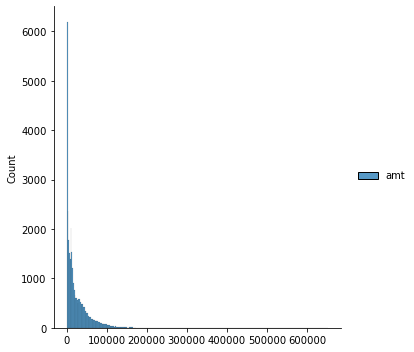

In [40]:
sns.displot(X_train[numerical_columns])

### Column amt has a high skew value (The acceptable skew value is [-0.5,0.5]). A feature of log transformed amt can be created to minimize the skew value.

In [41]:
np.log(X_train[numerical_columns]).skew()

amt   -0.921301
dtype: float64

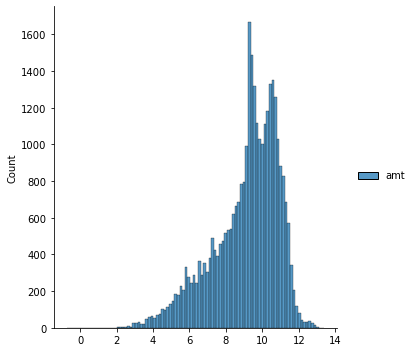

In [42]:
sns.displot(np.log(X_train[numerical_columns]))

### Log transformation is not a effictive solution so we can try use sqrt and cubrt.

In [43]:
np.sqrt(X_train[numerical_columns]).skew()

amt    1.001094
dtype: float64

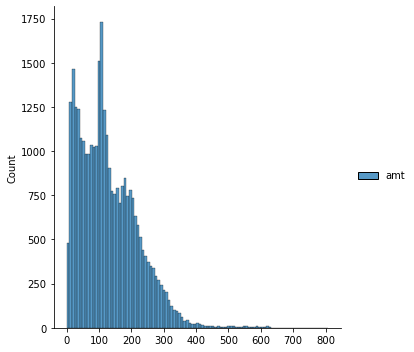

In [44]:
sns.displot(np.sqrt(X_train[numerical_columns]))

In [45]:
np.cbrt(X_train[numerical_columns]).skew()

amt    0.36928
dtype: float64

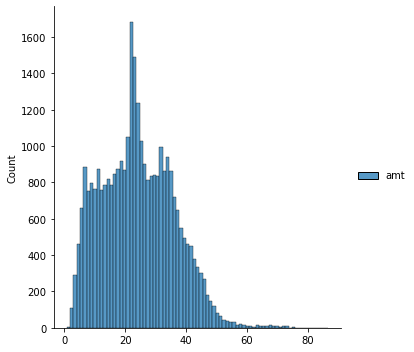

In [46]:
sns.displot(np.cbrt(X_train[numerical_columns]))

### Cube root transformation will be the best option in this case.

In [47]:
X_train[numerical_columns]=np.cbrt(X_train[numerical_columns])

In [48]:
X_train[numerical_columns]

,amt
0,31.042701
1,18.485407
2,2.688502
3,8.017036
4,33.517910
...,...
32158,22.540224
32159,42.437866
32160,4.454372
32161,38.734395


### Populating these changes in validation and test set.

In [49]:
X_validation[numerical_columns]=np.cbrt(X_validation[numerical_columns])
X_test[numerical_columns]=np.cbrt(X_test[numerical_columns])

### Dealing with categorical columns

In [50]:
categorical_columns=list(X_train.columns[X_train.dtypes=='object'])
categorical_columns

['business_code',
 'cust_number',
 'name_customer',
 'invoice_currency',
 'document type',
 'cust_payment_terms']

In [51]:
X_train[categorical_columns]

,business_code,cust_number,name_customer,invoice_currency,document type,cust_payment_terms
0,U001,0200769623,WAL-MAR in,USD,RV,NAH4
1,U001,0200769623,WAL-MAR foundation,USD,RV,NAH4
2,U001,0200726979,BJ'S us,USD,RV,NAA8
3,U001,0200769623,WAL-MAR corporation,USD,RV,NAH4
4,U001,0200769623,WAL-MAR corp,USD,RV,NAH4
...,...,...,...,...,...,...
32158,U001,0200759878,SA trust,USD,RV,NAH4
32159,U001,0200759082,INGL corp,USD,RV,NAA8
32160,U001,0200078795,H T H foundation,USD,RV,NAA8
32161,U001,0200769623,WAL-MAR llc,USD,RV,NAH4


In [52]:
X_train[categorical_columns].nunique()

business_code            6
cust_number           1315
name_customer         3626
invoice_currency         2
document type            2
cust_payment_terms      60
dtype: int64

### Let's see the different unique values in each of the categorical columns.

In [53]:
for col in categorical_columns:
    print(col)
    print(X_train[col].unique(),'\n')

business_code
['U001' 'CA02' 'U013' 'U002' 'U007' 'U005'] 

cust_number
['0200769623' '0200726979' '0200759878' ... '0200032829' '0100048904'
 '0100035829'] 

name_customer
['WAL-MAR in' 'WAL-MAR foundation' "BJ'S  us" ... 'MICH foundation'
 'AFFILI associates' 'CASEY llc'] 

invoice_currency
['USD' 'CAD'] 

document type
['RV' 'X2'] 

cust_payment_terms
['NAH4' 'NAA8' 'NAWP' 'NAU5' 'NAG2' 'CA10' 'NAD5' 'NAUZ' 'NAVE' 'NAAX'
 'NA32' 'NA9X' 'NAC6' 'NAVF' 'NAAW' 'NAX2' 'NA10' 'NAD1' 'NAM1' 'NAM2'
 'NAM4' 'CA30' 'NA3B' 'NAVQ' 'NA31' 'NAD4' 'NAVM' 'NABG' 'NACB' 'NAGD'
 'C106' 'NAUP' 'NAB1' 'NA38' 'NA8Q' 'CAX2' 'NANC' 'NAV9' 'NAVL' 'NA25'
 'BR56' 'NATH' 'B052' 'NAD8' 'NA3F' 'NAVC' 'NA84' 'CAB1' 'NAVD' 'NAV2'
 'NATK' 'NAVR' 'NAWN' 'NATM' 'B112' 'NATU' 'MC15' 'NATV' 'NAWU' 'NAUY'] 



### We need to encode the other categorical columns as our our model only understands numerical data.We will do that in feature engineering


### Now we will plot graph and analyse the pattern which will help us in further feature engineering step.

In [54]:
X_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,amt
0,U001,0200769623,WAL-MAR in,2019-01-10,2019-01-01,1.928544e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,40978.46,2018-12-30,NAH4,1.928544e+09,31.042701
1,U001,0200769623,WAL-MAR foundation,2019-01-11,2019-01-01,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,8652.95,2018-12-30,NAH4,1.928543e+09,18.485407
2,U001,0200726979,BJ'S us,2019-01-15,2019-01-01,1.928539e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,26.62,2018-12-30,NAA8,1.928539e+09,2.688502
3,U001,0200769623,WAL-MAR corporation,2019-01-09,2019-01-01,1.928539e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,705.86,2018-12-30,NAH4,1.928539e+09,8.017036
4,U001,0200769623,WAL-MAR corp,2019-01-09,2019-01-01,1.928539e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,51583.16,2018-12-30,NAH4,1.928539e+09,33.517910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32158,U001,0200759878,SA trust,2019-10-24,2019-01-01,1.929982e+09,2019-10-09,2019-10-07,2019-10-09,2019-10-24,USD,RV,15687.43,2019-10-09,NAH4,1.929982e+09,22.540224
32159,U001,0200759082,INGL corp,2019-10-25,2019-01-01,1.929989e+09,2019-10-09,2019-10-09,2019-10-09,2019-10-24,USD,RV,104697.85,2019-10-09,NAA8,1.929989e+09,42.437866
32160,U001,0200078795,H T H foundation,2019-10-23,2019-01-01,1.929990e+09,2019-10-09,2019-10-09,2019-10-09,2019-10-24,USD,RV,121.07,2019-10-09,NAA8,1.929990e+09,4.454372
32161,U001,0200769623,WAL-MAR llc,2019-10-21,2019-01-01,1.929984e+09,2019-10-09,2019-10-08,2019-10-09,2019-10-24,USD,RV,79609.97,2019-10-09,NAH4,1.929984e+09,38.734395


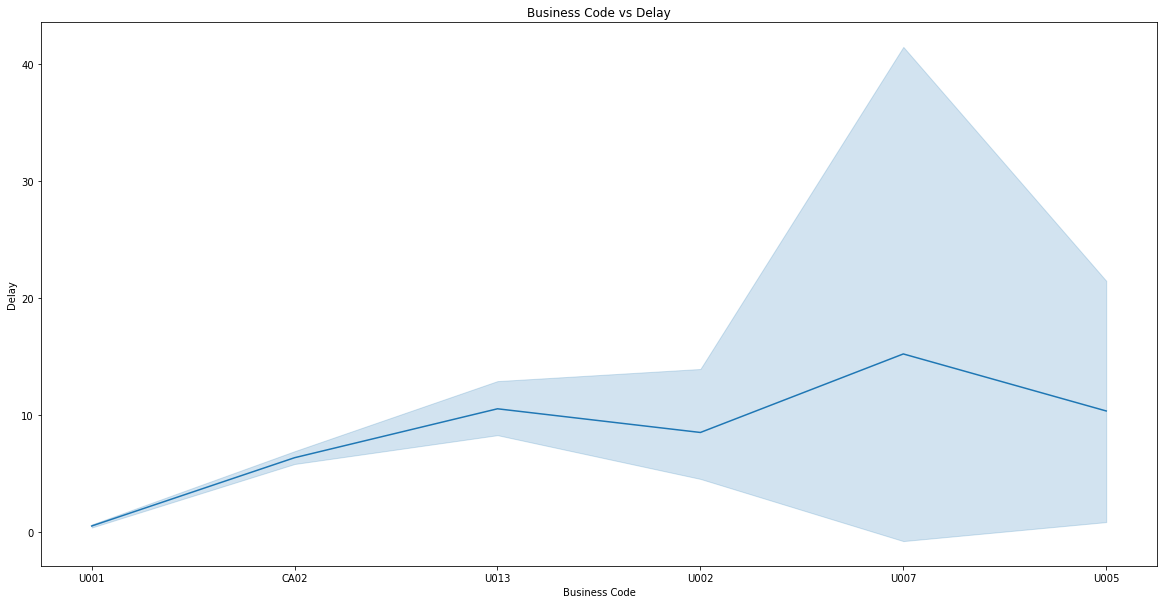

In [55]:
plt.figure(figsize=(20,10))
sns.lineplot(x=X_train['business_code'],y= Y_train)
plt.xlabel("Business Code")
plt.ylabel("Delay")
plt.title("Business Code vs Delay")
plt.show()

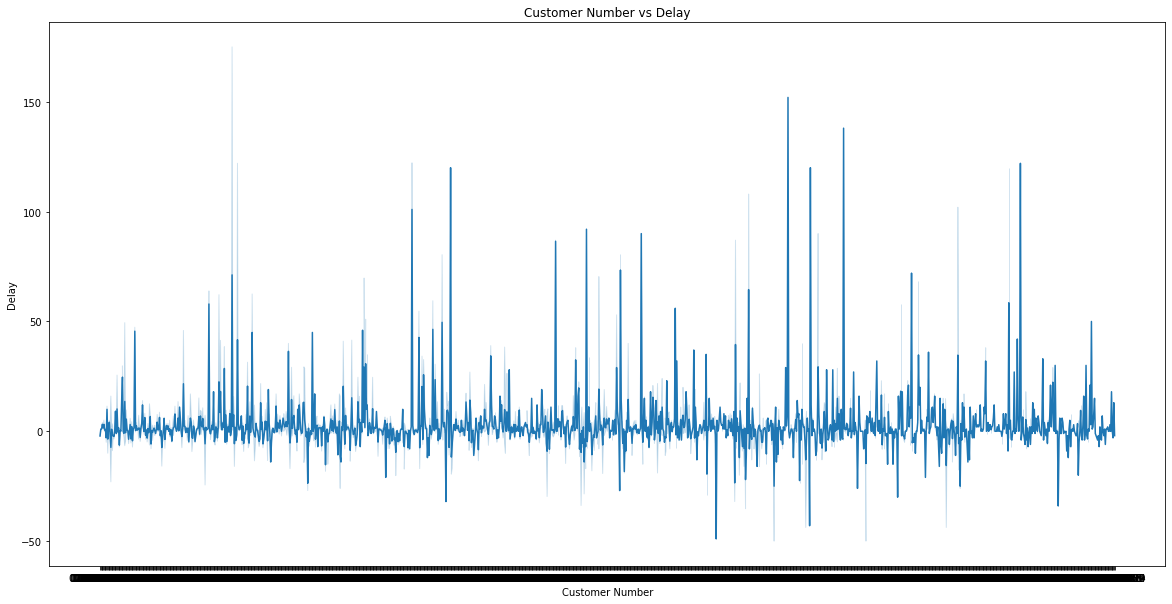

In [56]:
plt.figure(figsize=(20,10))
sns.lineplot(x=X_train['cust_number'],y= Y_train)
plt.xlabel("Customer Number")
plt.ylabel("Delay")
plt.title("Customer Number vs Delay")
plt.show()

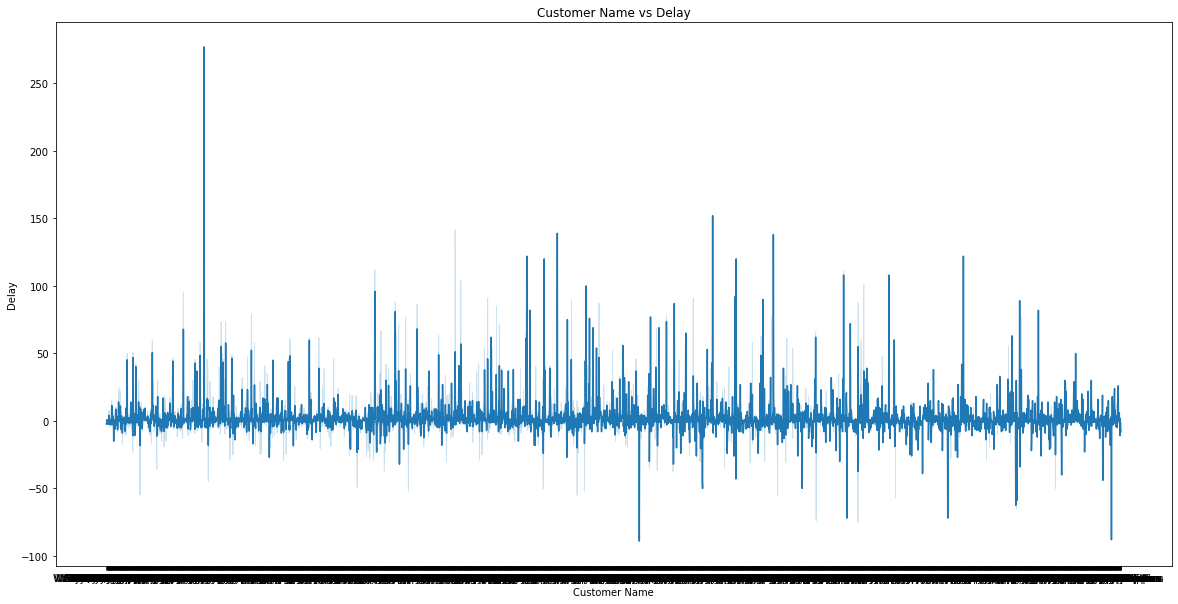

In [57]:
plt.figure(figsize=(20,10))
sns.lineplot(x=X_train['name_customer'],y= Y_train)
plt.xlabel("Customer Name")
plt.ylabel("Delay")
plt.title("Customer Name vs Delay")
plt.show()

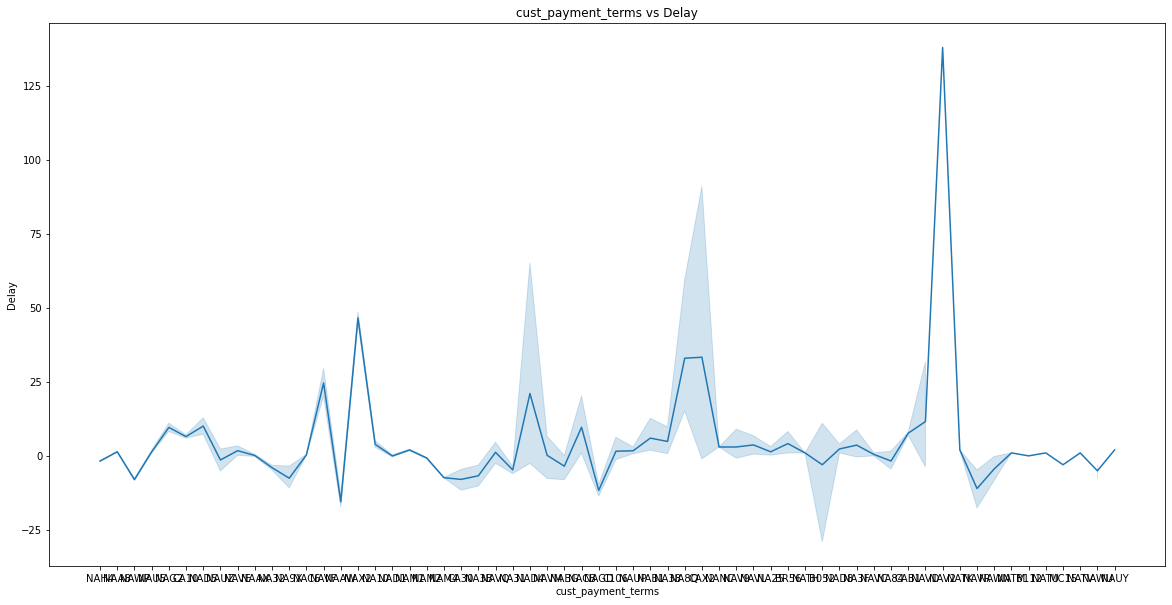

In [58]:
plt.figure(figsize=(20,10))
sns.lineplot(x=X_train['cust_payment_terms'],y= Y_train)
plt.xlabel("cust_payment_terms")
plt.ylabel("Delay")
plt.title("cust_payment_terms vs Delay")
plt.show()

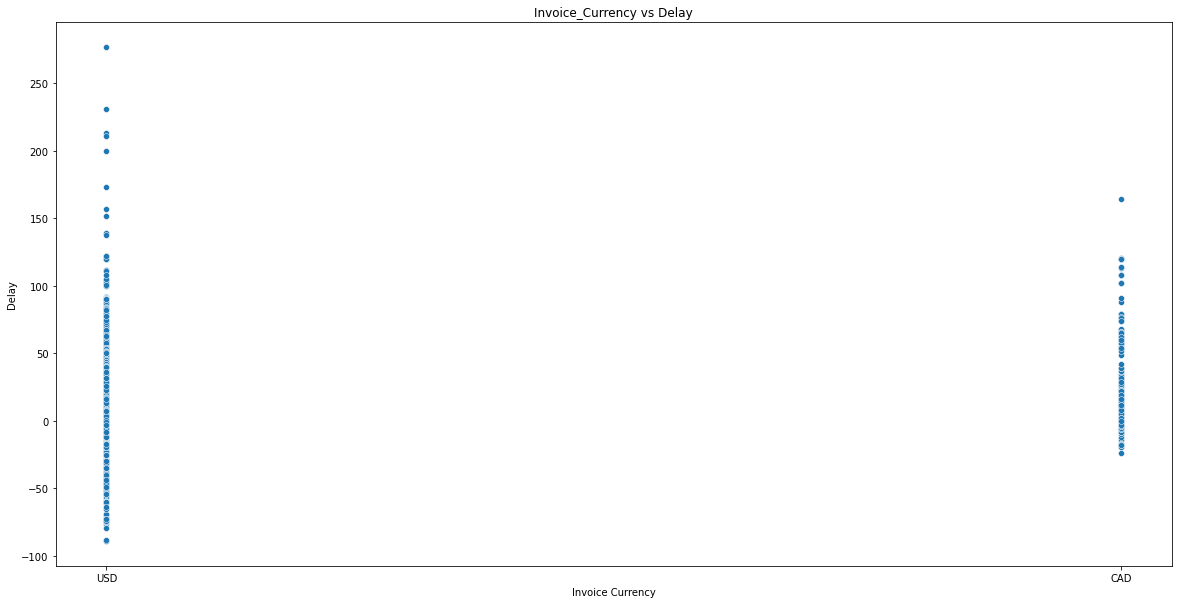

In [59]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=X_train['invoice_currency'],y= Y_train)
plt.xlabel("Invoice Currency")
plt.ylabel("Delay")
plt.title("Invoice_Currency vs Delay")
plt.show()

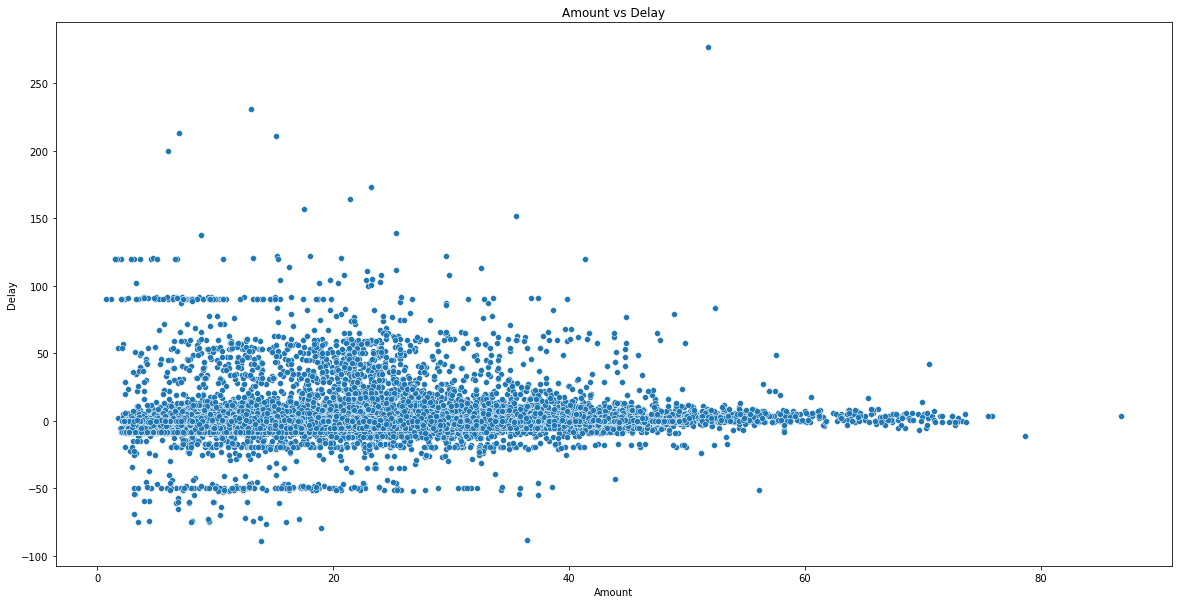

In [60]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=X_train['amt'],y= Y_train)
plt.xlabel("Amount")
plt.ylabel("Delay")
plt.title("Amount vs Delay")
plt.show()

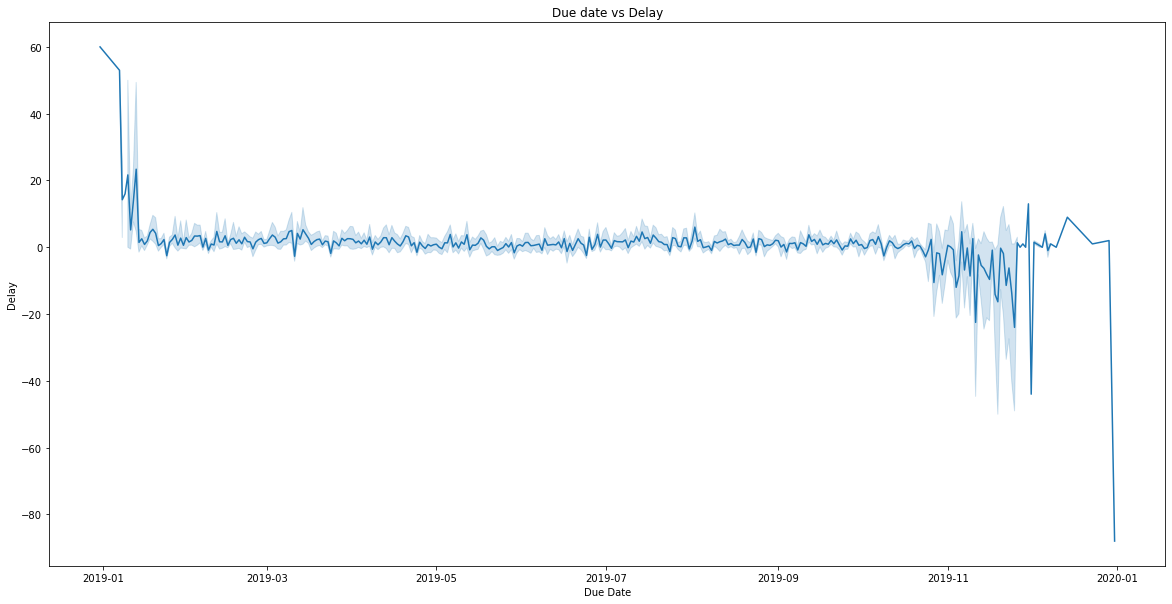

In [61]:
plt.figure(figsize=(20,10))
sns.lineplot(x=X_train['due_in_date'],y=Y_train)
plt.xlabel("Due Date")
plt.ylabel("Delay")
plt.title("Due date vs Delay")
plt.show()

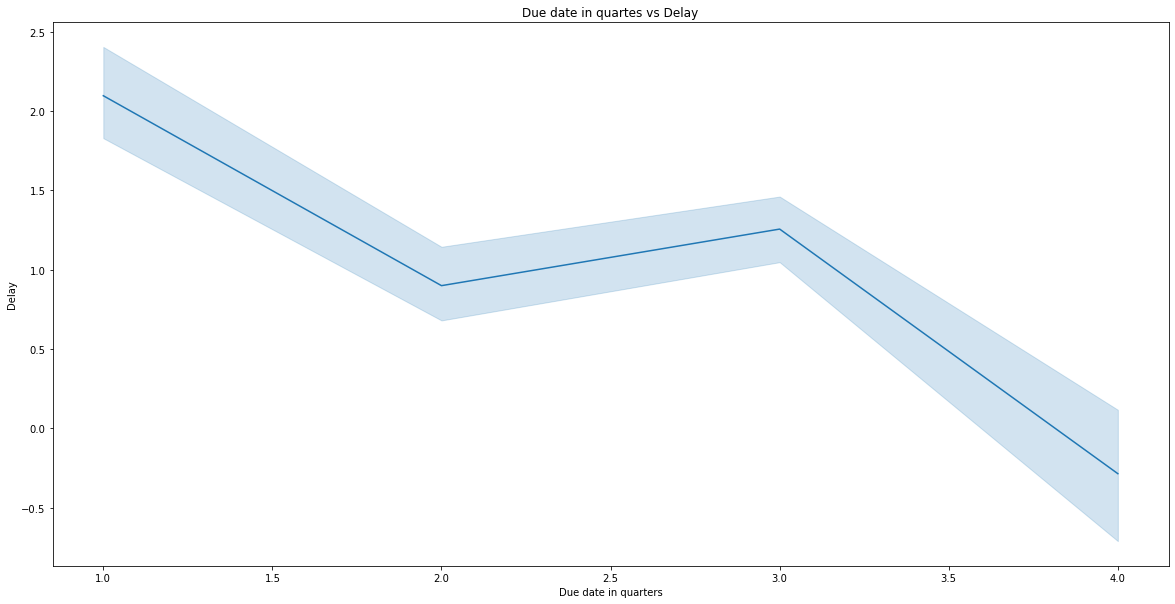

In [62]:
plt.figure(figsize=(20,10))
sns.lineplot(x=X_train['due_in_date'].dt.quarter,y=Y_train)
plt.xlabel("Due date in quarters")
plt.ylabel("Delay")
plt.title("Due date in quartes vs Delay")
plt.show()

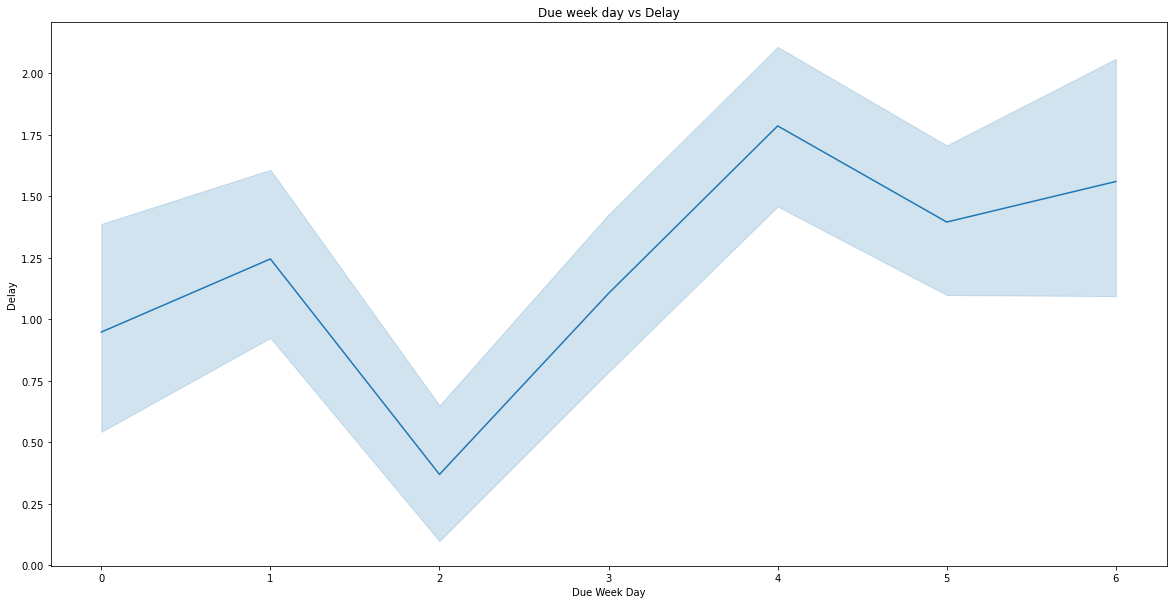

In [63]:
plt.figure(figsize=(20,10))
sns.lineplot(x=X_train['due_in_date'].dt.dayofweek,y=Y_train)
plt.xlabel("Due Week Day")
plt.ylabel("Delay")
plt.title("Due week day vs Delay")
plt.show()

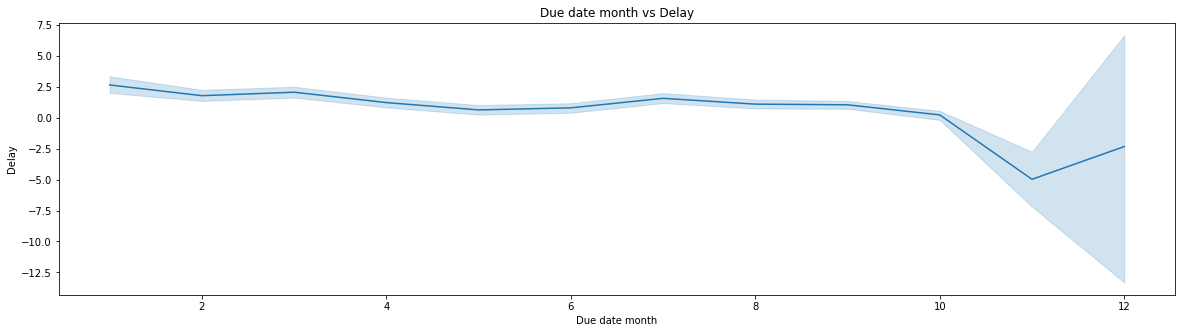

In [64]:
plt.figure(figsize=(20,5))
sns.lineplot(x=X_train['due_in_date'].dt.month,y=Y_train)
plt.xlabel("Due date month")
plt.ylabel("Delay")
plt.title("Due date month vs Delay")
plt.show()

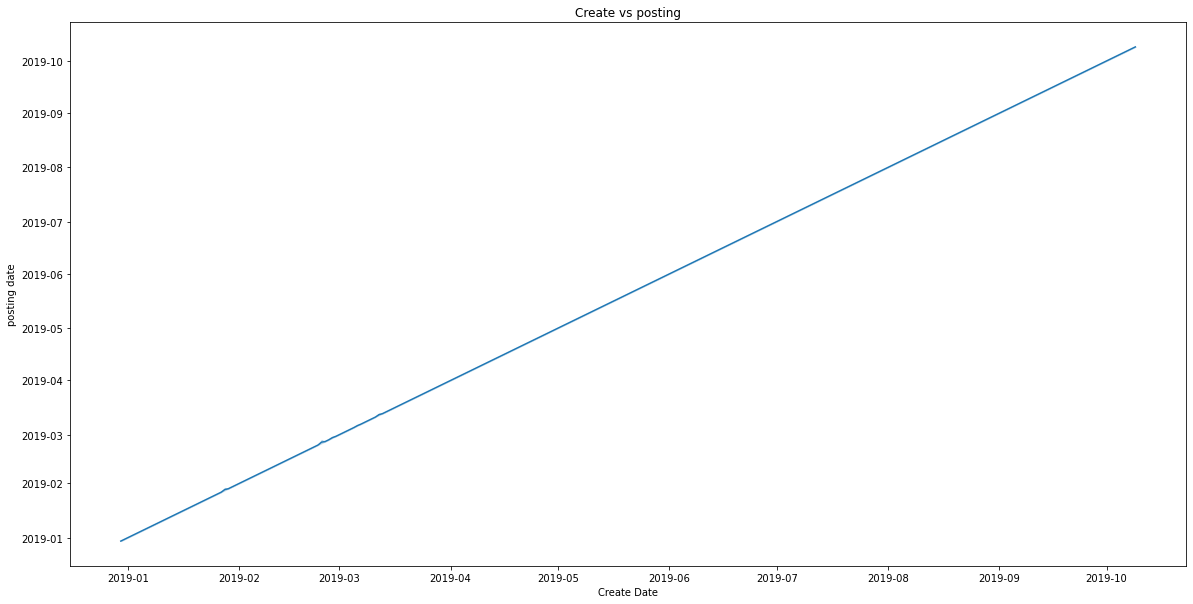

In [65]:
plt.figure(figsize=(20,10))
sns.lineplot(x=X_train['document_create_date.1'],y=X_train['posting_date'])
plt.xlabel("Create Date")
plt.ylabel("posting date")
plt.title("Create vs posting")
plt.show()

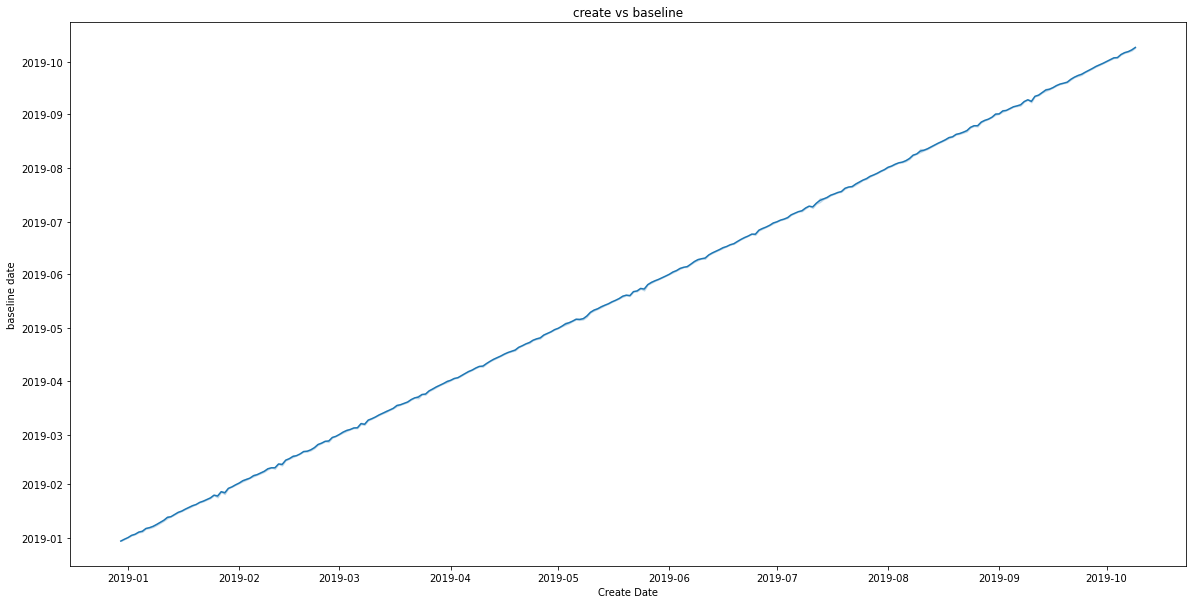

In [66]:
plt.figure(figsize=(20,10))
sns.lineplot(x=X_train['document_create_date.1'],y=X_train['baseline_create_date'])
plt.xlabel("Create Date")
plt.ylabel("baseline date")
plt.title("create vs baseline")
plt.show()

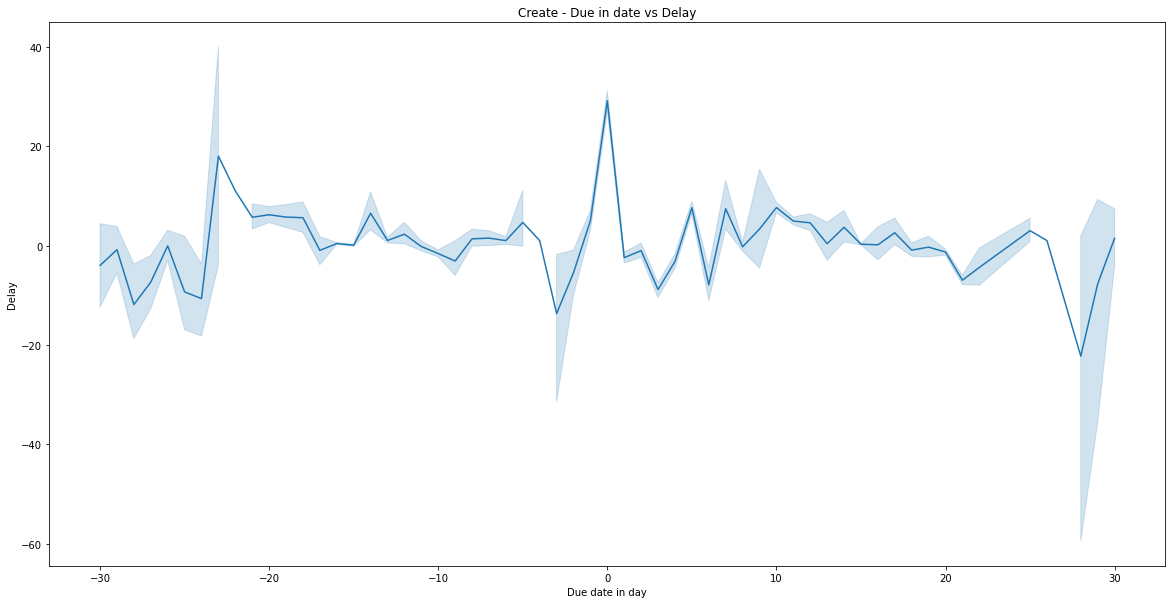

In [67]:
plt.figure(figsize=(20,10))
sns.lineplot(x=(X_train['due_in_date'].dt.day-X_train['document_create_date.1'].dt.day),y=Y_train)
plt.xlabel("Due date in day")
plt.ylabel("Delay")
plt.title("Create - Due in date vs Delay")
plt.show()

### Now we will perform feature engineering from the inferences drawn from the EDA.

# Feature Engineering

### Label encoding business_code column

In [68]:
le = LabelEncoder() 
X_train['business_encode']= le.fit_transform(X_train['business_code'])

In [69]:
X_train[['business_encode','business_code']]

,business_encode,business_code
0,1,U001
1,1,U001
2,1,U001
3,1,U001
4,1,U001
...,...,...
32158,1,U001
32159,1,U001
32160,1,U001
32161,1,U001


In [70]:
dict1={}
a=zip(X_train['business_code'].unique(),X_train['business_encode'].unique())
for x,y in a:
    dict1[x]=y
print(dict1)

{'U001': 1, 'CA02': 0, 'U013': 5, 'U002': 2, 'U007': 4, 'U005': 3}


### Mapping the changes to validation and test set

In [71]:
X_validation['business_encode']=X_validation['business_code'].map(dict1)
X_test['business_encode']=X_test['business_code'].map(dict1)
X_validation['business_encode'].fillna(X_train['business_encode'].mode(),inplace=True)
X_test['business_encode'].fillna(X_train['business_encode'].mode(),inplace=True)

### Label encoding invoice_currency column

In [72]:
le = LabelEncoder() 
X_train['invoice_currency_encode']= le.fit_transform(X_train['invoice_currency'])

In [73]:
dict1={}
a=zip(X_train['invoice_currency'].unique(),X_train['invoice_currency_encode'].unique())
for x,y in a:
    dict1[x]=y
print(dict1)

{'USD': 1, 'CAD': 0}


### Mapping the changes to validation and test set

In [74]:
X_validation['invoice_currency_encode']=X_validation['invoice_currency'].map(dict1)
X_test['invoice_currency_encode']=X_test['invoice_currency'].map(dict1)
X_validation['invoice_currency_encode'].fillna(X_train['invoice_currency_encode'].mode(),inplace=True)
X_test['invoice_currency_encode'].fillna(X_train['invoice_currency_encode'].mode(),inplace=True)

In [75]:
X_test['invoice_currency']

39055    USD
39056    USD
39057    USD
39058    USD
39059    USD
        ... 
45943    USD
45944    USD
45945    CAD
45946    USD
45947    USD
Name: invoice_currency, Length: 6893, dtype: object

### Label encoding document_type column

In [76]:
le = LabelEncoder() 
X_train['document_type_encode']= le.fit_transform(X_train['document type'])

In [77]:
dict1={}
a=zip(X_train['document type'].unique(),X_train['document_type_encode'].unique())
for x,y in a:
    dict1[x]=y
print(dict1)

{'RV': 0, 'X2': 1}


### Mapping the changes to validation and test set

In [78]:
X_validation['document_type_encode']=X_validation['document type'].map(dict1)
X_test['document_type_encode']=X_test['document type'].map(dict1)
X_validation['document_type_encode'].fillna(X_train['document_type_encode'].mode(),inplace=True)
X_test['document_type_encode'].fillna(X_train['document_type_encode'].mode(),inplace=True)

### Target Encoding cust_number

### We are including our target column in X_train for target encoding and we will drop it after that to avoid pattern leakage.

In [79]:
X_train['target']=Y_train

In [80]:
map_cust=X_train.groupby("cust_number")['target'].mean().to_dict()

In [81]:
X_train['cust_mean_delay']=X_train['cust_number'].map(map_cust)

### Mapping the changes in validation and test set.

In [82]:
X_validation['cust_mean_delay']=X_validation['cust_number'].map(map_cust)
X_test['cust_mean_delay']=X_test['cust_number'].map(map_cust)
X_validation['cust_mean_delay'].fillna(X_train['cust_mean_delay'].median(),inplace=True)
X_test['cust_mean_delay'].fillna(X_train['cust_mean_delay'].median(),inplace=True)

### Target Encoding name_customer column

In [83]:
map_custname=X_train.groupby("name_customer")['target'].median().to_dict()
X_train['custname_mean_delay']=X_train['name_customer'].map(map_custname)

### Populating these changes in validation and test set

In [84]:
X_validation['custname_mean_delay']=X_validation['name_customer'].map(map_custname)
X_test['custname_mean_delay']=X_test['name_customer'].map(map_custname)
X_validation['custname_mean_delay'].fillna(X_train['custname_mean_delay'].median(),inplace=True)
X_test['custname_mean_delay'].fillna(X_train['custname_mean_delay'].median(),inplace=True)

### Target encoding business_code column

In [85]:
map_bus_code=X_train.groupby("business_code")['target'].mean().to_dict()
X_train['bus_code']=X_train['business_code'].map(map_bus_code)

X_validation['bus_code']=X_validation['business_code'].map(map_bus_code)
X_test['bus_code']=X_test['business_code'].map(map_bus_code)
X_validation['bus_code'].fillna(X_train['bus_code'].median(),inplace=True)
X_test['bus_code'].fillna(X_train['bus_code'].median(),inplace=True)

### Target encoding customer_pay_terms

In [86]:
map_pay_code=X_train.groupby('cust_payment_terms')['target'].mean().to_dict()
X_train['pay_code']=X_train['cust_payment_terms'].map(map_pay_code)

X_validation['pay_code']=X_validation['cust_payment_terms'].map(map_pay_code)
X_test['pay_code']=X_test['cust_payment_terms'].map(map_pay_code)
X_validation['pay_code'].fillna(X_train['pay_code'].median(),inplace=True)
X_test['pay_code'].fillna(X_train['pay_code'].median(),inplace=True)

### On the basis of our EDA we are extracting features from are date columns.

In [87]:
X_train['week']=X_train['due_in_date'].dt.dayofweek

In [88]:
X_train['quarter']=X_train['due_in_date'].dt.quarter

In [89]:
X_train['day']=X_train['due_in_date'].dt.day

In [90]:
X_train['month']=X_train['due_in_date'].dt.month

In [91]:
X_train['diff_create_due']=X_train['due_in_date'].dt.day-X_train['document_create_date.1'].dt.day

### Making same changes in our validation and test set as well.

In [92]:
X_validation['week']=X_validation['due_in_date'].dt.dayofweek
X_test['week']=X_test['due_in_date'].dt.dayofweek

In [93]:
X_validation['quarter']=X_validation['due_in_date'].dt.quarter
X_test['quarter']=X_test['due_in_date'].dt.quarter

In [94]:
X_validation['day']=X_validation['due_in_date'].dt.day
X_test['day']=X_test['due_in_date'].dt.day

In [95]:
X_validation['month']=X_validation['due_in_date'].dt.month
X_test['month']=X_test['due_in_date'].dt.month

In [96]:
X_validation['diff_create_due']=X_validation['due_in_date'].dt.day-X_validation['document_create_date.1'].dt.day
X_test['diff_create_due']=X_test['due_in_date'].dt.day-X_test['document_create_date.1'].dt.day

# Feature Selection

In [97]:
X_train.dtypes

business_code                      object
cust_number                        object
name_customer                      object
clear_date                 datetime64[ns]
buisness_year              datetime64[ns]
doc_id                            float64
posting_date               datetime64[ns]
document_create_date       datetime64[ns]
document_create_date.1     datetime64[ns]
due_in_date                datetime64[ns]
invoice_currency                   object
document type                      object
total_open_amount                 float64
baseline_create_date       datetime64[ns]
cust_payment_terms                 object
invoice_id                        float64
amt                               float64
business_encode                     int32
invoice_currency_encode             int32
document_type_encode                int32
target                              int64
cust_mean_delay                   float64
custname_mean_delay               float64
bus_code                          

### Filter Method

### Correlation Coefficient

Correlation is a measure of the linear relationship of 2 or more variables.

In [98]:
X_train.corr()

,doc_id,total_open_amount,invoice_id,amt,business_encode,invoice_currency_encode,document_type_encode,target,cust_mean_delay,custname_mean_delay,bus_code,pay_code,week,quarter,day,month,diff_create_due
doc_id,1.000000,0.171736,1.000000,0.188029,-0.477649,-0.954811,0.339090,0.149242,0.198934,0.185491,0.752214,0.219094,0.031159,-0.013595,0.000422,-0.012271,0.000184
total_open_amount,0.171736,1.000000,0.184258,0.890750,-0.121813,-0.184594,-0.004723,0.003145,0.006020,0.020375,0.125178,0.061731,0.002625,0.003436,-0.006957,0.003404,-0.013143
invoice_id,1.000000,0.184258,1.000000,0.199982,-0.499296,-0.999583,NaN,0.131298,0.195683,0.171653,0.787445,0.229132,0.031527,-0.008696,0.003343,-0.008012,0.003539
amt,0.188029,0.890750,0.199982,1.000000,-0.121140,-0.200090,-0.000287,0.012375,0.026284,0.042465,0.145343,0.084043,0.018791,0.000109,-0.010245,0.000313,-0.016542
business_encode,-0.477649,-0.121813,-0.499296,-0.121140,1.000000,0.523095,-0.023792,0.020891,0.030677,0.024570,0.122544,0.035347,-0.028629,0.030304,0.001857,0.031677,-0.004570
invoice_currency_encode,-0.954811,-0.184594,-0.999583,-0.200090,0.523095,1.000000,-0.045482,-0.131269,-0.192758,-0.170362,-0.770011,-0.224197,-0.032168,0.011518,-0.002859,0.010847,-0.003246
document_type_encode,0.339090,-0.004723,NaN,-0.000287,-0.023792,-0.045482,1.000000,0.076979,0.044701,0.072848,0.035022,0.010466,0.004429,-0.015971,-0.008030,-0.013961,-0.009274
target,0.149242,0.003145,0.131298,0.012375,0.020891,-0.131269,0.076979,1.000000,0.681004,0.695284,0.170477,0.585250,0.021446,-0.043727,-0.012912,-0.045694,-0.002116
cust_mean_delay,0.198934,0.006020,0.195683,0.026284,0.030677,-0.192758,0.044701,0.681004,1.000000,0.898933,0.250332,0.753478,0.006513,-0.014007,0.000802,-0.012811,-0.000601
custname_mean_delay,0.185491,0.020375,0.171653,0.042465,0.024570,-0.170362,0.072848,0.695284,0.898933,1.000000,0.216607,0.718211,0.007106,-0.015190,-0.004926,-0.014765,-0.004626


### Visualisation

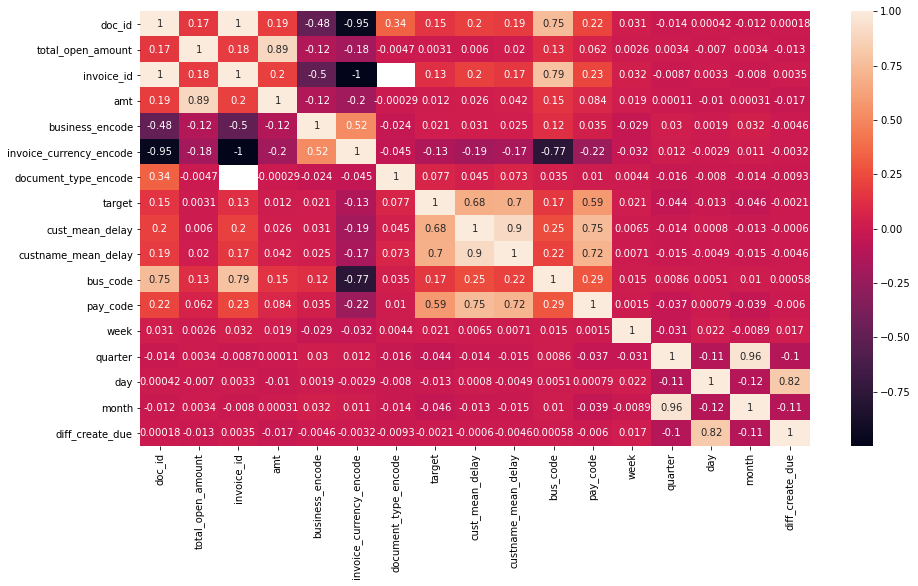

In [99]:
corr=X_train.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)

### Selecting numerical columns as our model understands numerical valuesonly.

In [100]:
train_new=X_train.select_dtypes(include=['float64','int64','int32']).copy()
train_new

,doc_id,total_open_amount,invoice_id,amt,business_encode,invoice_currency_encode,document_type_encode,target,cust_mean_delay,custname_mean_delay,bus_code,pay_code,week,quarter,day,month,diff_create_due
0,1.928544e+09,40978.46,1.928544e+09,31.042701,1,1,0,-4,-2.142689,-4.0,0.541315,-1.759942,0,1,14,1,-16
1,1.928543e+09,8652.95,1.928543e+09,18.485407,1,1,0,-3,-2.142689,-4.0,0.541315,-1.759942,0,1,14,1,-16
2,1.928539e+09,26.62,1.928539e+09,2.688502,1,1,0,1,0.946903,0.0,0.541315,1.395301,0,1,14,1,-16
3,1.928539e+09,705.86,1.928539e+09,8.017036,1,1,0,-5,-2.142689,-3.0,0.541315,-1.759942,0,1,14,1,-16
4,1.928539e+09,51583.16,1.928539e+09,33.517910,1,1,0,-5,-2.142689,-4.0,0.541315,-1.759942,0,1,14,1,-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32158,1.929982e+09,15687.43,1.929982e+09,22.540224,1,1,0,0,1.084507,1.0,0.541315,-1.759942,3,4,24,10,15
32159,1.929989e+09,104697.85,1.929989e+09,42.437866,1,1,0,1,-0.447368,1.0,0.541315,1.395301,3,4,24,10,15
32160,1.929990e+09,121.07,1.929990e+09,4.454372,1,1,0,-1,1.133333,0.0,0.541315,1.395301,3,4,24,10,15
32161,1.929984e+09,79609.97,1.929984e+09,38.734395,1,1,0,-3,-2.142689,-4.0,0.541315,-1.759942,3,4,24,10,15


In [101]:
def handling_correlation(X_train,threshold=0.8):
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = X_train.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [102]:
#in the time of checking co-relation we have to check with target also that's why I am passing out output_label also
handling_correlation(train_new.copy(),0.85)

['amt',
 'custname_mean_delay',
 'month',
 'invoice_id',
 'invoice_currency_encode']

We should select that feature which have higher co-releation with output_label but we should also consider its correlation with other feature in case the correlation between two features are high we will cosider ther one having higer corelation with the target and remove the lower one.

We will also remove the targer vaiable after handling the correlation.

In [103]:
train_new.drop(['bus_code','doc_id','invoice_id','target','total_open_amount','invoice_currency_encode','cust_mean_delay','quarter',],axis=1,inplace=True)

In [104]:
train_new.dtypes

amt                     float64
business_encode           int32
document_type_encode      int32
custname_mean_delay     float64
pay_code                float64
week                      int64
day                       int64
month                     int64
diff_create_due           int64
dtype: object

### Embedded Method


I am using tree based algorithms in modelling.
Here you can show feature importance of all features and youn can easily select top n features which have 
highest feature importance

In [105]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

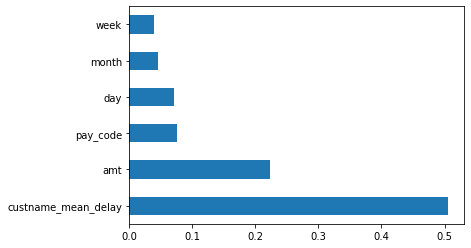

In [106]:
feature_importance=tree_based_feature_importance(train_new,Y_train)#features importance data frame

#Now you can choose top n features with higher feature importances.

 #I am taking n=4 

In [107]:
display(feature_importance)

,Features,Importances
3,custname_mean_delay,0.505319
0,amt,0.223286
4,pay_code,0.076180
6,day,0.071271
7,month,0.046092
5,week,0.039667
8,diff_create_due,0.030224
1,business_encode,0.006427
2,document_type_encode,0.001534


In [108]:
### Selecting our top 4 features

In [109]:
train=X_train[['custname_mean_delay', 'pay_code','amt','day']]
validation=X_validation[['custname_mean_delay', 'pay_code','amt','day']]
test=X_test[['custname_mean_delay', 'pay_code','amt','day']]

# Modeling

### Random Forest Regressor

In [110]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Defining Lists to Store in the Results 
MSE_Score = []
R2_Score = []
Name = []

In [111]:
# Fitting Random Forest Regressor Tree to the Training Set
from sklearn.ensemble import RandomForestRegressor
Name.append('Validation Set Result')
clf = RandomForestRegressor()
clf.fit(train, Y_train)

# Predicting the Validation Set Results
predicted = clf.predict(validation)


MSE_Score.append(mean_squared_error(Y_validation, predicted))
R2_Score.append(r2_score(Y_validation, predicted))

In [112]:
Score = pd.DataFrame(list(zip(Name, MSE_Score, R2_Score)), columns = ['Name', 'MSE_Score', 'R2_Score'])

In [113]:
# Score Card
Score

,Name,MSE_Score,R2_Score
0,Validation Set Result,39.465936,0.139456


# Performing some hyperparameter tunning

In [114]:
# Performing tunning in our model
from sklearn.ensemble import RandomForestRegressor
Name.append('Validation Set Result Afrter Hyperparameter Tunning')
clf = RandomForestRegressor(n_estimators= 150, max_depth= 10, bootstrap= True, min_samples_split=20,random_state=20)
clf.fit(train, Y_train)

# Predicting the validation Set Results after tunning
predicted = clf.predict(validation)


MSE_Score.append(mean_squared_error(Y_validation, predicted))
R2_Score.append(r2_score(Y_validation, predicted))

In [115]:
Score = pd.DataFrame(list(zip(Name, MSE_Score, R2_Score)), columns = ['Name', 'MSE_Score', 'R2_Score'])
# Score Card
Score

,Name,MSE_Score,R2_Score
0,Validation Set Result,39.465936,0.139456
1,Validation Set Result Afrter Hyperparameter Tu...,28.667876,0.374904


In [116]:
#Testing 
Name.append('Test Set Result')
predicted = clf.predict(test)

MSE_Score.append(mean_squared_error(Y_test, predicted))
R2_Score.append(r2_score(Y_test, predicted))

In [117]:
Score = pd.DataFrame(list(zip(Name, MSE_Score, R2_Score)), columns = ['Name', 'MSE_Score', 'R2_Score'])

In [118]:
# Score Card
Score

,Name,MSE_Score,R2_Score
0,Validation Set Result,39.465936,0.139456
1,Validation Set Result Afrter Hyperparameter Tu...,28.667876,0.374904
2,Test Set Result,59.332808,0.413103


# Final Prediction

### Predicting the clear date and bucket for the datframe which had records wuth clearing date =NULL

In [119]:
df2

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
46047,U001,0200230690,DECA trust,NaT,2020-01-01,1.930808e+09,2020-04-21,2020-04-21,2020-04-21,2020-04-26,USD,RV,1.0,NaN,29508.90,2020-04-16,NAM2,1.930808e+09,1
46048,U001,100032505,KEHE corp,NaT,2020-01-01,1.930645e+09,2020-03-20,2020-03-12,2020-03-20,2020-04-04,USD,RV,1.0,NaN,6644.11,2020-03-20,NAA8,1.930645e+09,1
46049,U001,0200769623,WAL-MAR corporation,NaT,2020-01-01,1.930861e+09,2020-05-07,2020-05-06,2020-05-07,2020-05-22,USD,RV,1.0,NaN,3882.90,2020-05-07,NAH4,1.930861e+09,1
46050,U001,0200435191,C& corp,NaT,2020-01-01,1.930715e+09,2020-04-03,2020-03-28,2020-04-03,2020-06-07,USD,RV,1.0,NaN,4199.93,2020-04-03,NAGD,1.930715e+09,1
46051,U001,0200714710,SYSCO trust,NaT,2020-01-01,1.930664e+09,2020-03-21,2020-03-18,2020-03-21,2020-04-05,USD,RV,1.0,NaN,34737.61,2020-03-21,NAA8,1.930664e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200337148,COAS us,NaT,2020-01-01,1.930696e+09,2020-03-25,2020-03-25,2020-03-25,2020-04-09,USD,RV,1.0,NaN,60257.96,2020-03-25,NAA8,1.930696e+09,1
49996,U001,0200744019,TARG,NaT,2020-01-01,1.930734e+09,2020-04-03,2020-04-02,2020-04-03,2020-04-18,USD,RV,1.0,NaN,611.22,2020-04-03,NAA8,1.930734e+09,1
49997,U001,0200769623,WAL-MAR in,NaT,2020-01-01,1.930648e+09,2020-03-15,2020-03-13,2020-03-15,2020-03-30,USD,RV,1.0,NaN,67343.64,2020-03-15,NAH4,1.930648e+09,1
49998,U001,0200769623,WAL-MAR associates,NaT,2020-01-01,1.930741e+09,2020-04-04,2020-04-03,2020-04-04,2020-04-19,USD,RV,1.0,NaN,153.21,2020-04-04,NAH4,1.930741e+09,1


### Mapping the selected feature which was finalized in the train set.

In [120]:
df2['pay_code']=df2['cust_payment_terms'].map(map_pay_code)
df2['pay_code'].fillna(X_train['pay_code'].median(),inplace=True)
df2['custname_mean_delay']=df2['name_customer'].map(map_custname)
df2['custname_mean_delay'].fillna(X_train['custname_mean_delay'].mean(),inplace=True)
df2['day']=df2['due_in_date'].dt.day
df2['month']=df2['due_in_date'].dt.month
df2['amt']=np.cbrt(df2['total_open_amount'])

In [121]:
df2_new=df2[['custname_mean_delay', 'pay_code','amt','day']]

### Predicting the Test Set Results
### Then applying ceil() on it and stroring it in the dataframe after that calculating the clear date from predicted delay and then finding their respective bucket wrt to delay.

In [122]:
predicted = clf.predict(df2_new)

In [123]:
predicted
#predicted value

array([-2.50562739,  1.71604213, -2.39815564, ..., -3.05357299,
        0.31036999,  2.46764197])

In [124]:
p_delay=np.ceil(predicted)
#applying ceil funtion

In [125]:
df2=df2.reset_index(drop=True)

In [126]:
df2['p_delay']=p_delay

In [127]:
df2

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,baseline_create_date,cust_payment_terms,invoice_id,isOpen,pay_code,custname_mean_delay,day,month,amt,p_delay
0,U001,0200230690,DECA trust,NaT,2020-01-01,1.930808e+09,2020-04-21,2020-04-21,2020-04-21,2020-04-26,...,2020-04-16,NAM2,1.930808e+09,1,-0.747922,-5.0,26,4,30.901840,-2.0
1,U001,100032505,KEHE corp,NaT,2020-01-01,1.930645e+09,2020-03-20,2020-03-12,2020-03-20,2020-04-04,...,2020-03-20,NAA8,1.930645e+09,1,1.395301,1.0,4,4,18.799470,2.0
2,U001,0200769623,WAL-MAR corporation,NaT,2020-01-01,1.930861e+09,2020-05-07,2020-05-06,2020-05-07,2020-05-22,...,2020-05-07,NAH4,1.930861e+09,1,-1.759942,-3.0,22,5,15.717570,-2.0
3,U001,0200435191,C& corp,NaT,2020-01-01,1.930715e+09,2020-04-03,2020-03-28,2020-04-03,2020-06-07,...,2020-04-03,NAGD,1.930715e+09,1,-11.656743,-5.0,7,6,16.134197,-26.0
4,U001,0200714710,SYSCO trust,NaT,2020-01-01,1.930664e+09,2020-03-21,2020-03-18,2020-03-21,2020-04-05,...,2020-03-21,NAA8,1.930664e+09,1,1.395301,1.5,5,4,32.628716,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933,U001,0200337148,COAS us,NaT,2020-01-01,1.930696e+09,2020-03-25,2020-03-25,2020-03-25,2020-04-09,...,2020-03-25,NAA8,1.930696e+09,1,1.395301,0.0,9,4,39.204701,1.0
3934,U001,0200744019,TARG,NaT,2020-01-01,1.930734e+09,2020-04-03,2020-04-02,2020-04-03,2020-04-18,...,2020-04-03,NAA8,1.930734e+09,1,1.395301,2.0,18,4,8.486576,4.0
3935,U001,0200769623,WAL-MAR in,NaT,2020-01-01,1.930648e+09,2020-03-15,2020-03-13,2020-03-15,2020-03-30,...,2020-03-15,NAH4,1.930648e+09,1,-1.759942,-4.0,30,3,40.684801,-3.0
3936,U001,0200769623,WAL-MAR associates,NaT,2020-01-01,1.930741e+09,2020-04-04,2020-04-03,2020-04-04,2020-04-19,...,2020-04-04,NAH4,1.930741e+09,1,-1.759942,-4.0,19,4,5.350927,1.0


In [128]:
#Adding delay to due date to get clear date
import datetime
new=[]
for i in range(0,3938):
    new.append(df2['due_in_date'][i] + datetime.timedelta(days=int(df2['p_delay'][i])))
new
df2['clear_date']=pd.DataFrame(new)
df2.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,baseline_create_date,cust_payment_terms,invoice_id,isOpen,pay_code,custname_mean_delay,day,month,amt,p_delay
0,U001,0200230690,DECA trust,2020-04-24,2020-01-01,1.930808e+09,2020-04-21,2020-04-21,2020-04-21,2020-04-26,...,2020-04-16,NAM2,1.930808e+09,1,-0.747922,-5.0,26,4,30.901840,-2.0
1,U001,100032505,KEHE corp,2020-04-06,2020-01-01,1.930645e+09,2020-03-20,2020-03-12,2020-03-20,2020-04-04,...,2020-03-20,NAA8,1.930645e+09,1,1.395301,1.0,4,4,18.799470,2.0
2,U001,0200769623,WAL-MAR corporation,2020-05-20,2020-01-01,1.930861e+09,2020-05-07,2020-05-06,2020-05-07,2020-05-22,...,2020-05-07,NAH4,1.930861e+09,1,-1.759942,-3.0,22,5,15.717570,-2.0
3,U001,0200435191,C& corp,2020-05-12,2020-01-01,1.930715e+09,2020-04-03,2020-03-28,2020-04-03,2020-06-07,...,2020-04-03,NAGD,1.930715e+09,1,-11.656743,-5.0,7,6,16.134197,-26.0
4,U001,0200714710,SYSCO trust,2020-04-07,2020-01-01,1.930664e+09,2020-03-21,2020-03-18,2020-03-21,2020-04-05,...,2020-03-21,NAA8,1.930664e+09,1,1.395301,1.5,5,4,32.628716,2.0


In [129]:
#Assigning buckets
df2['bucket']=np.where((df2['p_delay']<=15),"0-15",np.where((df2['p_delay']>15) & (df2['p_delay']<=30),"15-30",np.where((df2['p_delay']>30) & (df2['p_delay']<=60),"30-60",">60")))

# Final Predictied values

In [130]:
df2

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,cust_payment_terms,invoice_id,isOpen,pay_code,custname_mean_delay,day,month,amt,p_delay,bucket
0,U001,0200230690,DECA trust,2020-04-24,2020-01-01,1.930808e+09,2020-04-21,2020-04-21,2020-04-21,2020-04-26,...,NAM2,1.930808e+09,1,-0.747922,-5.0,26,4,30.901840,-2.0,0-15
1,U001,100032505,KEHE corp,2020-04-06,2020-01-01,1.930645e+09,2020-03-20,2020-03-12,2020-03-20,2020-04-04,...,NAA8,1.930645e+09,1,1.395301,1.0,4,4,18.799470,2.0,0-15
2,U001,0200769623,WAL-MAR corporation,2020-05-20,2020-01-01,1.930861e+09,2020-05-07,2020-05-06,2020-05-07,2020-05-22,...,NAH4,1.930861e+09,1,-1.759942,-3.0,22,5,15.717570,-2.0,0-15
3,U001,0200435191,C& corp,2020-05-12,2020-01-01,1.930715e+09,2020-04-03,2020-03-28,2020-04-03,2020-06-07,...,NAGD,1.930715e+09,1,-11.656743,-5.0,7,6,16.134197,-26.0,0-15
4,U001,0200714710,SYSCO trust,2020-04-07,2020-01-01,1.930664e+09,2020-03-21,2020-03-18,2020-03-21,2020-04-05,...,NAA8,1.930664e+09,1,1.395301,1.5,5,4,32.628716,2.0,0-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933,U001,0200337148,COAS us,2020-04-10,2020-01-01,1.930696e+09,2020-03-25,2020-03-25,2020-03-25,2020-04-09,...,NAA8,1.930696e+09,1,1.395301,0.0,9,4,39.204701,1.0,0-15
3934,U001,0200744019,TARG,2020-04-22,2020-01-01,1.930734e+09,2020-04-03,2020-04-02,2020-04-03,2020-04-18,...,NAA8,1.930734e+09,1,1.395301,2.0,18,4,8.486576,4.0,0-15
3935,U001,0200769623,WAL-MAR in,2020-03-27,2020-01-01,1.930648e+09,2020-03-15,2020-03-13,2020-03-15,2020-03-30,...,NAH4,1.930648e+09,1,-1.759942,-4.0,30,3,40.684801,-3.0,0-15
3936,U001,0200769623,WAL-MAR associates,2020-04-20,2020-01-01,1.930741e+09,2020-04-04,2020-04-03,2020-04-04,2020-04-19,...,NAH4,1.930741e+09,1,-1.759942,-4.0,19,4,5.350927,1.0,0-15


In [131]:
df2[['cust_number','name_customer','document_create_date.1','due_in_date','clear_date','bucket']].sample(50)

,cust_number,name_customer,document_create_date.1,due_in_date,clear_date,bucket
3320,0200729290,KROGER,2020-03-24,2020-04-08,2020-04-09,0-15
1867,0200769623,WAL-MAR co,2020-03-09,2020-03-24,2020-03-22,0-15
839,0200769623,WAL-MAR co,2020-03-19,2020-04-03,2020-04-05,0-15
3411,0200769623,WAL-MAR systems,2020-03-29,2020-04-13,2020-04-10,0-15
1573,0200762301,C&S WH systems,2020-03-24,2020-04-08,2020-04-09,0-15
1940,0200726979,BJ'S in,2020-03-12,2020-03-27,2020-03-28,0-15
1773,0200782669,SYGMA corporation,2020-05-06,2020-05-21,2020-05-25,0-15
1898,0140142846,MONDE in,2020-03-06,2020-05-05,2020-05-23,15-30
1642,0200769623,WAL-MAR foundation,2020-05-09,2020-05-24,2020-05-22,0-15
1756,0200769623,WAL-MAR foundation,2020-04-06,2020-04-21,2020-04-19,0-15


In [132]:
import pickle

In [169]:
with open('1806346.pkl','wb') as f:
    pickle.dump((map_pay_code,map_custname,paynull,namenull,clf),f)

In [170]:
with open('1806346.pkl','rb') as f:
    a,b,c,d,e=pickle.load(f)

In [150]:
a

{'B052': -3.0,
 'B112': 0.0,
 'BR56': 4.142857142857143,
 'C106': 1.5714285714285714,
 'CA10': 6.513733075435203,
 'CA30': -7.944444444444445,
 'CAB1': 7.666666666666667,
 'CAX2': 33.333333333333336,
 'MC15': -3.0,
 'NA10': 3.8843283582089554,
 'NA25': 1.375,
 'NA31': -4.75,
 'NA32': -3.9743589743589745,
 'NA38': 4.869565217391305,
 'NA3B': -6.72972972972973,
 'NA3F': 3.6363636363636362,
 'NA84': -1.7333333333333334,
 'NA8Q': 33.0,
 'NA9X': -7.545454545454546,
 'NAA8': 1.395301487862177,
 'NAAW': -15.511450381679388,
 'NAAX': 0.13151041666666666,
 'NAB1': 6.0,
 'NABG': -3.4761904761904763,
 'NAC6': 0.3183000867302689,
 'NACB': 9.678571428571429,
 'NAD1': -0.016233766233766232,
 'NAD4': 21.066666666666666,
 'NAD5': 10.07391304347826,
 'NAD8': 2.3333333333333335,
 'NAG2': 9.6112,
 'NAGD': -11.656742556917688,
 'NAH4': -1.7599423284873243,
 'NAM1': 1.992,
 'NAM2': -0.7479224376731302,
 'NAM4': -7.382113821138211,
 'NANC': 3.0,
 'NATH': 1.0,
 'NATK': 2.0,
 'NATM': 1.0,
 'NATU': 1.0,
 'NATV

In [151]:
b

{'11-17  corporation': 13.0,
 '113712 CA corp': 7.0,
 '17135 associates': 3.0,
 '17135 corp': 6.0,
 '236008 ': 0.0,
 '236008 corporation': 3.0,
 '99 CE ': 2.0,
 '99 CE associates': 2.0,
 '99 CE co': 3.0,
 '99 CE corp': 2.0,
 '99 CE corporation': 2.0,
 '99 CE foundation': 1.5,
 '99 CE in': 2.0,
 '99 CE llc': 4.0,
 '99 CE systems': 2.0,
 '99 CE us': 2.0,
 'A & W F ': 5.0,
 'A & W F associates': -1.0,
 'A & W F co': -2.0,
 'A & W F corporation': 1.5,
 'A & W F foundation': 4.0,
 'A & W F in': -3.0,
 'A & W F llc': 5.0,
 'A & W F systems': 5.5,
 'A & W F trust': -1.0,
 'A & W F us': 0.0,
 'ACE  co': -3.0,
 'ACE  systems': -1.0,
 'ADAMS  foundation': 0.0,
 'ADEL associates': 0.0,
 'ADEL in': 0.0,
 'ADEL systems': 0.0,
 'ADEL trust': 0.0,
 'ADVAN corporation': -2.0,
 'AFFI associates': -3.5,
 'AFFI co': -8.5,
 'AFFI corp': -4.0,
 'AFFI corporation': -6.0,
 'AFFI llc': -8.0,
 'AFFILI ': -5.0,
 'AFFILI associates': -6.0,
 'AFFILI co': -3.0,
 'AFFILI corp': -1.0,
 'AFFILI corporation': 3.0,
 'A

In [146]:
with open('1.pkl','wb') as f:
    pickle.dump(map_pay_code,f)

In [152]:
c

RandomForestRegressor(max_depth=10, min_samples_split=20, n_estimators=150,
                      random_state=20)

In [147]:
with open('1','rb') as f:
    a=pickle.load(f)
a    

FileNotFoundError: [Errno 2] No such file or directory: '1'

In [ ]:
np.predict(df2_new)

In [143]:
a

RandomForestRegressor(max_depth=10, min_samples_split=20, n_estimators=150,
                      random_state=20)

In [171]:
c

1.395301487862177

In [ ]:
df2_new

In [162]:
a='B052'
c=map_pay_code.get(a)

In [163]:
c

-3.0

In [165]:
paynull=X_train['pay_code'].median()

In [166]:
paynull

1.395301487862177

In [167]:
namenull=X_train['custname_mean_delay'].mean()

In [168]:
namenull

0.4863663215496067

In [174]:
'B052' in map_pay_code

True

In [173]:
map_pay_code

{'B052': -3.0,
 'B112': 0.0,
 'BR56': 4.142857142857143,
 'C106': 1.5714285714285714,
 'CA10': 6.513733075435203,
 'CA30': -7.944444444444445,
 'CAB1': 7.666666666666667,
 'CAX2': 33.333333333333336,
 'MC15': -3.0,
 'NA10': 3.8843283582089554,
 'NA25': 1.375,
 'NA31': -4.75,
 'NA32': -3.9743589743589745,
 'NA38': 4.869565217391305,
 'NA3B': -6.72972972972973,
 'NA3F': 3.6363636363636362,
 'NA84': -1.7333333333333334,
 'NA8Q': 33.0,
 'NA9X': -7.545454545454546,
 'NAA8': 1.395301487862177,
 'NAAW': -15.511450381679388,
 'NAAX': 0.13151041666666666,
 'NAB1': 6.0,
 'NABG': -3.4761904761904763,
 'NAC6': 0.3183000867302689,
 'NACB': 9.678571428571429,
 'NAD1': -0.016233766233766232,
 'NAD4': 21.066666666666666,
 'NAD5': 10.07391304347826,
 'NAD8': 2.3333333333333335,
 'NAG2': 9.6112,
 'NAGD': -11.656742556917688,
 'NAH4': -1.7599423284873243,
 'NAM1': 1.992,
 'NAM2': -0.7479224376731302,
 'NAM4': -7.382113821138211,
 'NANC': 3.0,
 'NATH': 1.0,
 'NATK': 2.0,
 'NATM': 1.0,
 'NATU': 1.0,
 'NATV